In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded =files.upload()

Saving cars_24_combined.csv to cars_24_combined.csv


In [51]:
df=pd.read_csv("cars_24_combined.csv", index_col=0)
df.head()

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [52]:
df.isnull().sum()

,0
Car Name,1
Year,1
Distance,0
Owner,0
Fuel,0
Location,213
Drive,0
Type,0
Price,0


In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().sum()

,0
Car Name,0
Year,0
Distance,0
Owner,0
Fuel,0
Location,0
Drive,0
Type,0
Price,0


In [55]:
df.shape

(7801, 9)

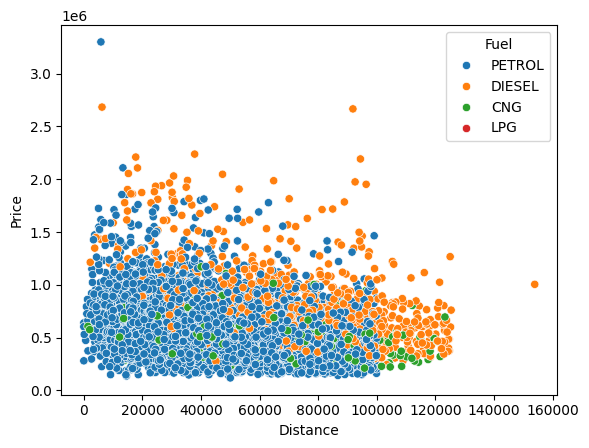

In [56]:
sns.scatterplot(data=df, x="Distance", y="Price", hue="Fuel")
plt.show()

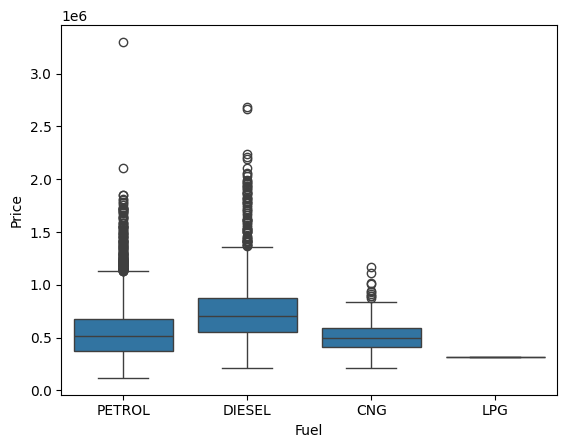

In [57]:
sns.boxplot(x="Fuel", y="Price", data=df)
plt.show()

In [58]:

num_cols = df.select_dtypes(include="number").columns

outlier_rows = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows.append(df[(df[col] < lower) | (df[col] > upper)])

outlier_df = pd.concat(outlier_rows).drop_duplicates()

outlier_df.head(50)

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
1706,BMW 3 Series,2013.0,153870,3,DIESEL,CH-01,Automatic,Lux_sedan,1005000
2209,Maruti Baleno,2018.0,53715,4,CNG,TS-08,Manual,HatchBack,651000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
51,Ford Endeavour,2019.0,94389,1,DIESEL,GJ-02,Manual,Lux_SUV,2192000
68,Mahindra XUV500,2018.0,105290,1,DIESEL,TS-07,Manual,Lux_SUV,1222000
93,Hyundai Tucson New,2018.0,86933,2,PETROL,UP-14,Manual,Lux_SUV,1221000
111,Mahindra XUV500,2018.0,105759,2,DIESEL,KA-09,Manual,Lux_SUV,1196000
123,Tata Safari,2021.0,25239,1,DIESEL,TN-14,Automatic,SUV,1810000
199,Mahindra XUV500,2018.0,69690,1,DIESEL,MH-47,Manual,Lux_SUV,1187000
235,Maruti Ciaz,2018.0,14290,1,PETROL,MH-14,Automatic,Sedan,1368000


In [59]:
df["Brand"] = df["Car Name"].str.split().str[0]
df["Model"] = df["Car Name"].str.split().str[1:3].str.join(" ")
df = df.drop(columns=["Car Name"])


In [60]:
df.head()

,Year,Distance,Owner,Fuel,Location,Drive,Type,Price,Brand,Model
0,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000,Maruti,S PRESSO
1,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000,Hyundai,Xcent
2,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000,Tata,Safari
3,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000,Maruti,Vitara Brezza
4,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000,Tata,Tiago


In [61]:
!pip install catboost -q

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
import numpy as np # Added for np.sqrt()


# Features + Target
X = df.drop("Price", axis=1)
y = df["Price"]


# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True, dtype=int)


# Split (NO stratify for regression)
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


# Scale only numeric features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)


# MODELS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "Linear_Regression": LinearRegression(),

    "Decision_Tree": DecisionTreeRegressor(max_depth=6, random_state=42),

    "Random_Forest": RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42),

    "Gradient_Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),

    "Support_Vector_Regression": SVR(kernel="rbf"),

    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, objective="reg:squarederror", random_state=42),

    "CatBoost": CatBoostRegressor(iterations=200, depth=6, learning_rate=0.05, verbose=False, random_state=42)}


# TRAIN + EVALUATE LOOP
for name, model in models.items():
    print("\nModel:", name)

    # Train
    model.fit(x_train_scaled, y_train)

    # Predict
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred  = model.predict(x_test_scaled)

    # Metrics
    mae_train  = mean_absolute_error(y_train, y_train_pred)
    mae_test   = mean_absolute_error(y_test, y_test_pred)

    # Calculate RMSE using np.sqrt() as 'squared' argument is not supported in older versions
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

    r2_train   = r2_score(y_train, y_train_pred)
    r2_test    = r2_score(y_test, y_test_pred)

    print(f"Train -> MAE:{mae_train:.2f} | RMSE:{rmse_train:.2f} | R2:{r2_train:.3f}")
    print(f"Test  -> MAE:{mae_test:.2f}  | RMSE:{rmse_test:.2f}  | R2:{r2_test:.3f}")



Model: Linear_Regression
Train -> MAE:64873.59 | RMSE:98328.46 | R2:0.867
Test  -> MAE:70166.07  | RMSE:103774.57  | R2:0.829

Model: Decision_Tree
Train -> MAE:110539.81 | RMSE:150715.72 | R2:0.688
Test  -> MAE:113737.59  | RMSE:157321.03  | R2:0.608

Model: Random_Forest
Train -> MAE:86993.72 | RMSE:116188.92 | R2:0.814
Test  -> MAE:91588.36  | RMSE:123855.45  | R2:0.757

Model: Gradient_Boosting
Train -> MAE:86176.81 | RMSE:121782.22 | R2:0.796
Test  -> MAE:85566.07  | RMSE:119767.38  | R2:0.773

Model: Support_Vector_Regression
Train -> MAE:192578.52 | RMSE:272989.71 | R2:-0.024
Test  -> MAE:183234.69  | RMSE:254281.90  | R2:-0.025

Model: XGBoost
Train -> MAE:38733.58 | RMSE:58256.36 | R2:0.953
Test  -> MAE:62879.41  | RMSE:98964.33  | R2:0.845

Model: CatBoost
Train -> MAE:83424.57 | RMSE:118899.14 | R2:0.806
Test  -> MAE:83101.11  | RMSE:115972.13  | R2:0.787


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(
        n_estimators=200,
        max_depth=6,
        objective="reg:squarederror",
        random_state=42
    ))
])

pipe.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [66]:
import joblib
joblib.dump(pipe, "car_price_model.pkl")


['car_price_model.pkl']

In [67]:
loaded = joblib.load("car_price_model.pkl")
loaded.predict(x_test[:5])


array([ 594187.3 , 1298706.4 ,  709815.2 ,  519607.44,  287614.28],
      dtype=float32)